# Catalan numbers

We'll write some programs to
generate all the "mountain ranges" of length $n$,
and therefore also the Catalan numbers (as a function of $n$).

## First, the Catalan numbers

We showed that
$$
  C_n = \sum_{j=0}^{n-1} C_{j} C_{n-j-1}
$$
(since each mountain range can be decomposed into the first mountain, of length $j$, plus the remainder).
Also, $C_0 = 1$.

In [18]:
def catalan(n):
    if n == 0:
        return 1
    else:
        # note the list comprehension
        return sum(
            [catalan(j) * catalan(n-j-1) for j in range(n)]
        )
    
# alternate form:
def catalan2(n):
    if n == 0:
        out = 1
    else:    
        out = 0
        for j in range(n):
            out += catalan(j) * catalan(n-j-1)
    return out

# small unit tests:
assert catalan(0) == 1
assert catalan(1) == 1
assert catalan(2) == 2
for n in range(10):
    assert catalan(n) == catalan2(n)

print([
    catalan(n) for n in range(12)
])

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862, 16796, 58786]


## Mountain ranges

We're going to define an *iterator* that iterates over all the possible
mountain ranges of length $n$. Here's an example of how these work:

In [19]:
# this is an iterator
def squares(n):
    for j in range(n):
        yield j**2
        
for j, n2 in enumerate(squares(10)):
    # note the f-string
    print(f"The {j}th square is {n2}.")

The 0th square is 0.
The 1th square is 1.
The 2th square is 4.
The 3th square is 9.
The 4th square is 16.
The 5th square is 25.
The 6th square is 36.
The 7th square is 49.
The 8th square is 64.
The 9th square is 81.


We'll define a recursive generator that (a) iterates over where the first mountain ends,
and (b) over combinations of shapes of that mountain and the remaining mountain range.

In [28]:
def mountains(n):
    if n == 0:
        yield ""
    else:
        for j in range(n):
            for left in mountains(j):
                for right in mountains(n-j-1):
                    # add "(" and ")" around left to make it a "single mountain",
                    # not a mountain range
                    yield "(" + left + ")" + right

                
for n in range(7):
    m = list(mountains(n))
    # check we have the right number of them
    assert len(m) == catalan(n)
    # check they're all unique
    assert len(m) == len(set(m))

In [42]:
import numpy as np

def mountain_path(m):
    '''
    Takes a string of k parentheses ``m`` and returns
    a vector of length k+1 whose value is equal to the
    number of "(" so far minus the number
    of ")".
    '''
    steps = [0] + [+1 if x == "(" else -1 for x in m]
    path = np.cumsum(steps)
    return(path)

assert np.all(mountain_path("") == [0])
assert np.all(
    mountain_path("((()))")
    ==
    [0, 1, 2, 3, 2, 1, 0]
)
assert np.all(
    mountain_path("((()()))")
    ==
    [0, 1, 2, 3, 2, 3, 2, 1, 0]
)

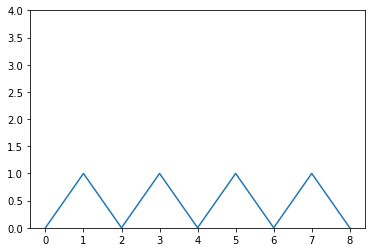

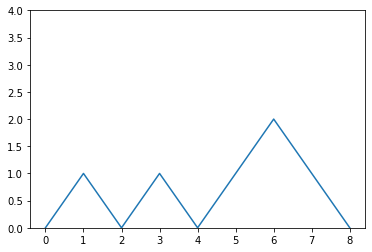

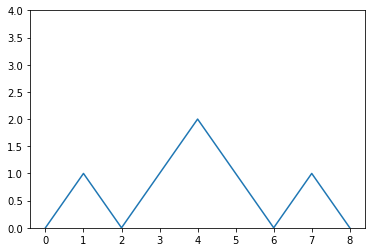

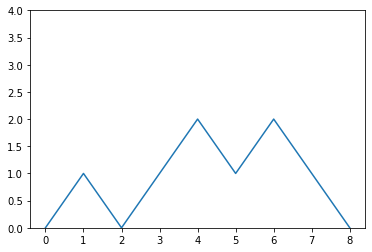

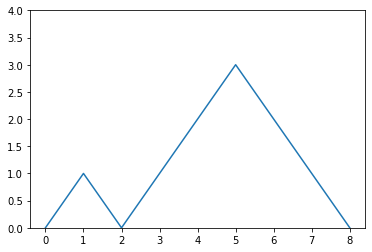

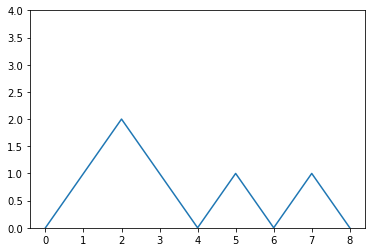

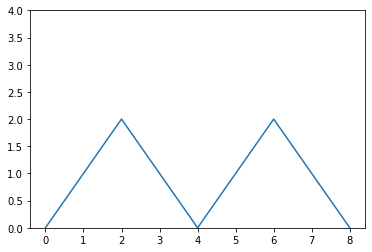

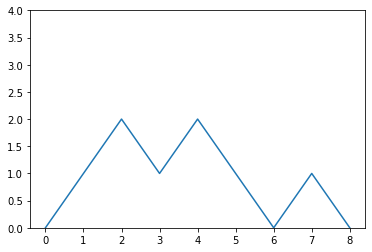

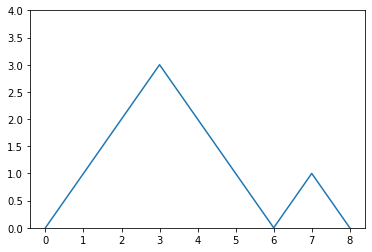

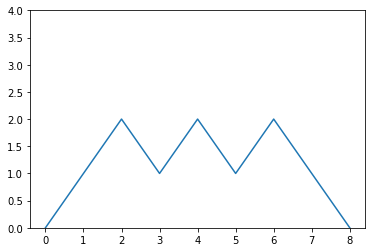

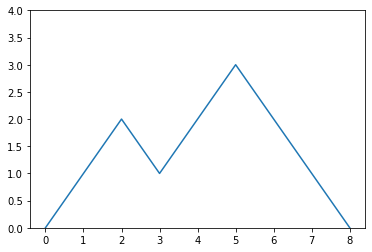

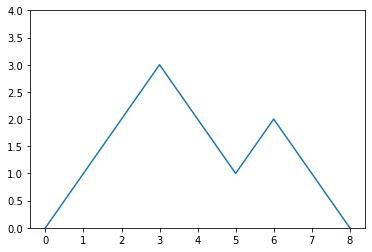

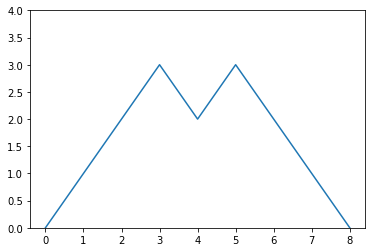

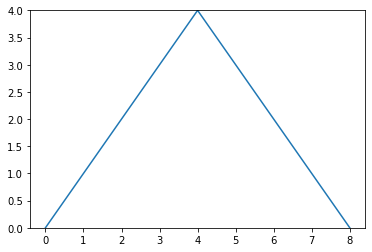

In [45]:
import matplotlib.pyplot as plt

n = 4
for m in mountains(n):
    fig, ax = plt.subplots()
    ax.plot(np.arange(2 * n + 1), mountain_path(m))
    ax.set_ylim(0, n)

We could also check this is working by iterating over *all* $2^n$ strings of "(" and ")"
but only yielding the valid ones, and comparing the results
to what we get with the recursive iterator above.